# Credit Risk

##### Context
  + Credit risks refer to the risks of loss on a debt that occurs when the borrower fails to repay the principal and related interest amounts of a loan back to the lender on due dates.
  
   + When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision for its approval or rejection. There are two types of risks associated with this decision:
     - If the applicant has good credit risk, i.e. is likely to repay the loan, then rejecting the loan results in a loss to the bank
     - If the applicant has bad credit risk, i.e. is unlikely to repay the loan, then approving the loan results in a loss to the bank

        It may be assumed that the second risk is a greater risk, as the bank (or any other institution lending the money to an untrustworthy party) had a higher chance of not being paid back the borrowed amount.


So it's on the part of the bank or other lending authority to evaluate the risks associated with lending money to a customer.

##### Problem Statement
Imagine a bank in your locality. The bank has realized that applying data science methodologies can help them focus their resources efficiently, make smarter decisions on credit risk calculations, and improve performance.

Earlier they used to check the credit risk of the loan applicants manually by analyzing their bank-related data, which used to take months of time. But this time they want a smart data scientist who can automate this process.

##### Objective
You are required to build a machine learning model that helps you predict the credit risk of the loan applicants.

#### Evaluation Criteria - Accuracy Score


#### Data Description

+ There are 20 attributes in the dataset. Some of them are mentioned below:

    1. checking_status: Status of the existing checking account
    2. duration: Duration in month
    3. credit_history: Credit history of the applicant
    4. purpose: Purpose of taking the earlier loans
    5. employment: Present employment since
    6. installment_commitment: Installment rate in percentage of disposable income
    7. personal_status: Personal status and sex
    8. other_parties: Other debtors/guarantors
    9. residence_since: Present residence since
    10. other_payment_plans: Other installment plans
    11. existing_credits: Number of existing credits at this bank
    12. class: The target variable(good, bad)


#### Hypothesis for Credit Risk

for Type 1 Risk, 
    - 
    Initially able to pay loans but due to some issues couldn't pay the loans
        - Job Loss, Loss in Businesses, Health Problems, or Death of Loanee
For Type 2 Risk, 
    - 
    Coustomer didn't want to pay loan amount intentionally.

#### 1. Loading Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Warning ignore
import warnings
warnings.filterwarnings('ignore')

##### 2. Loading Data & Checking Shape & Head Records

In [2]:
credit_risk = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )
credit_risk

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,...,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,...,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,...,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,...,car,26,none,rent,1,'unskilled resident',1,none,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,'0<=X<200',60,'all paid',other,14782,'100<=X<500','>=7',3,'female div/dep/mar',none,...,'no known property',60,bank,'for free',2,'high qualif/self emp/mgmt',1,yes,yes,bad
796,'0<=X<200',12,'critical/other existing credit','new car',2366,'500<=X<1000','4<=X<7',3,'male div/sep',none,...,car,36,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
797,'no checking',9,'critical/other existing credit','new car',1224,'<100','1<=X<4',3,'male single',none,...,'real estate',30,none,own,2,skilled,1,none,yes,good
798,'<0',18,'no credits/all paid',furniture/equipment,3114,'<100','<1',1,'female div/dep/mar',none,...,'life insurance',26,none,rent,1,skilled,1,none,yes,bad


#### Inspecting Data

In [3]:
print(f"Credit Risk consist {credit_risk.shape[0]} rows and {credit_risk.shape[1]} columns.")

Credit Risk consist 800 rows and 21 columns.


 1. Data consist 800 rows and 21 features.
 2. where 1 is Target & remaining 20 are independent variable.

In [4]:

credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

   - Data consists 7 numeric features and 14 are categorical features.
   - There are no missing or null values.

#### Statistical Summary

In [5]:
# Get a statistical overview on numerrical features
credit_risk.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,800.0,21.03125,12.171502,4.0,12.0,18.0,24.0,60.0
credit_amount,800.0,3337.87875,2866.828413,250.0,1364.0,2332.0,4166.0,18424.0
installment_commitment,800.0,2.94500,1.118498,1.0,2.0,3.0,4.0,4.0
residence_since,800.0,2.87875,1.092264,1.0,2.0,3.0,4.0,4.0
age,800.0,35.63125,11.757682,19.0,26.0,33.0,42.0,75.0
existing_credits,800.0,1.41000,0.574293,1.0,1.0,1.0,2.0,4.0
num_dependents,800.0,1.14250,0.349781,1.0,1.0,1.0,1.0,2.0


  - Atrribute duration and credit_amount and age has large difference in their 75% and maximum values, it means may be these attributes are affected with outliers. We will look this in Visualization section.
  - Their is huge difference in mean and meadian of credit_amount. Because mean easyly affected by outliers while meadian is robust to the outliers.
  
All these will be discussed in following sections.


#### Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000092346A7B80>,
      dtype=object)

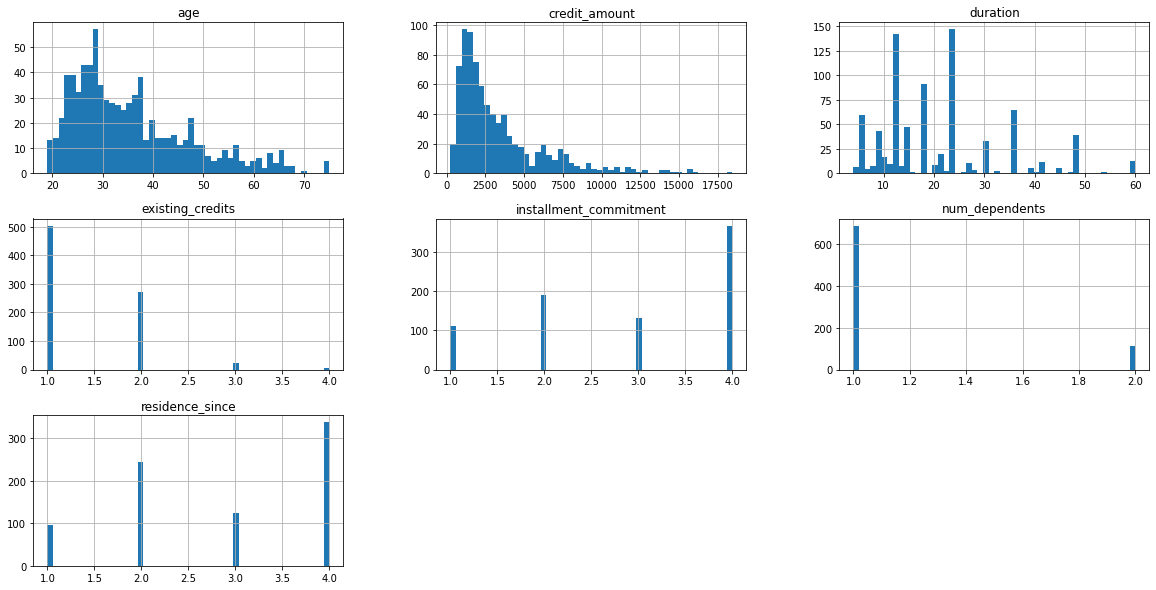

In [7]:
# Histogram of Numerical attributes
credit_risk.hist(bins = 50,figsize = (20, 10))

   - Attributes age, credit_amount, and duration are positively(right) skewed.
   - existing_credits have very less counts in 3 & 4 category.
   - num_dependents have most of observations at 1.

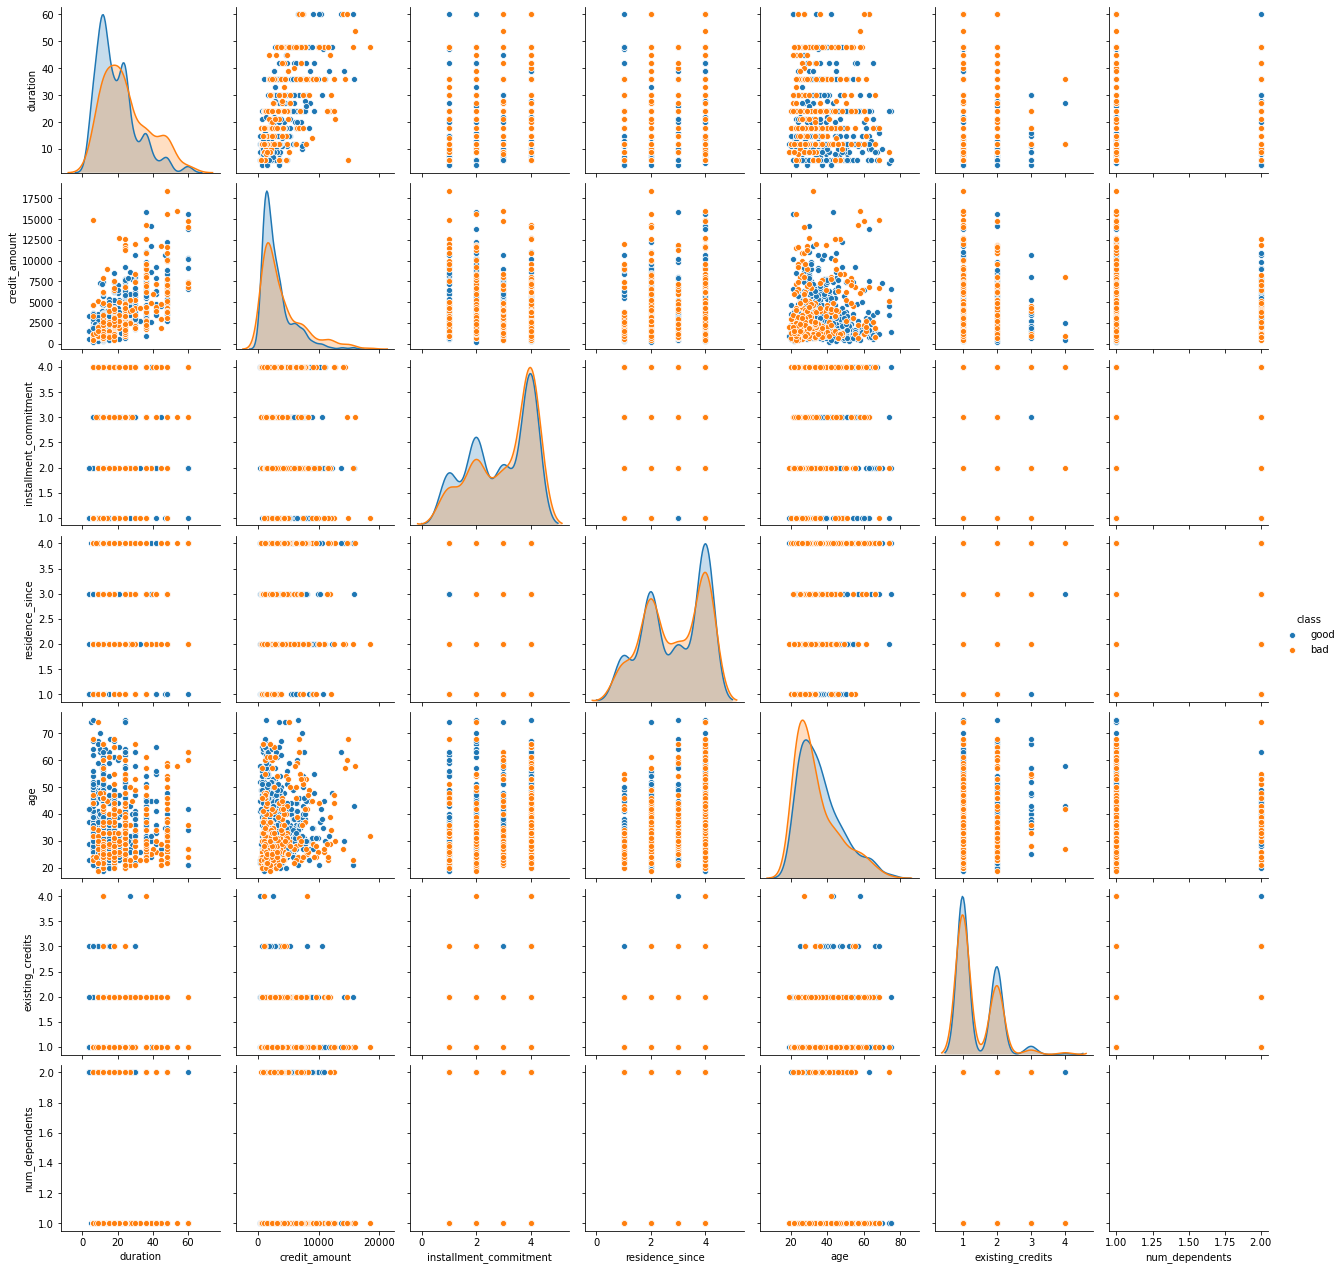

In [7]:
sns.pairplot(credit_risk, hue = 'class')

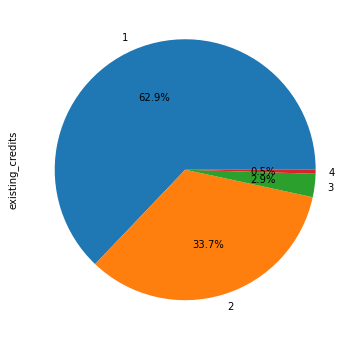

In [11]:
# existing_credits
credit_risk['existing_credits'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

   - category 3 & 4 both can make only 3.4% share. for more convenient we are going to merge them as 3 in preprocessing step later.

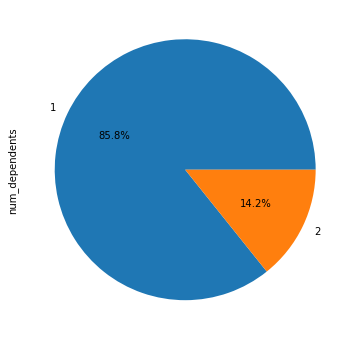

In [12]:
# num_dependents
credit_risk['num_dependents'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

  * this is highly bias distribution, anyways dependent doesn't affects credibility of customer. So we will reop this column.

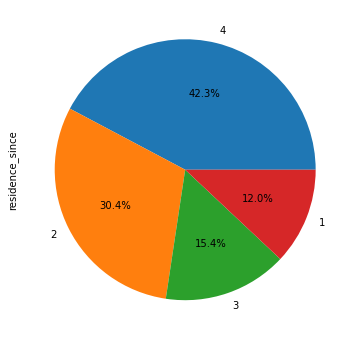

In [14]:
# residence_since
credit_risk['residence_since'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

'existing paid'                     412
'critical/other existing credit'    243
'delayed previously'                 74
'all paid'                           40
'no credits/all paid'                31
Name: credit_history, dtype: int64


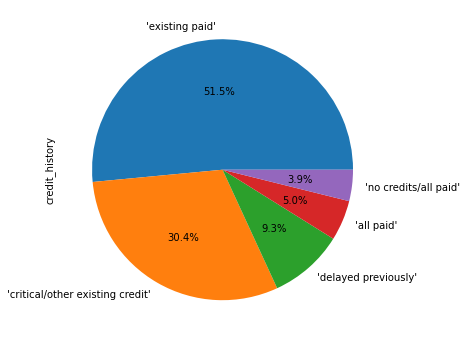

In [27]:
# credit_history
print(credit_risk['credit_history'].value_counts())
credit_risk['credit_history'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

  - 'all paid' and 'no credit / all paid' looks similar but writen different it mean their is no due remain on those loans. So later we are going to combine these two as 'no due / all paid'

radio/tv                215
'new car'               180
furniture/equipment     148
business                 84
'used car'               83
education                42
repairs                  18
other                    12
'domestic appliance'     10
retraining                8
Name: purpose, dtype: int64


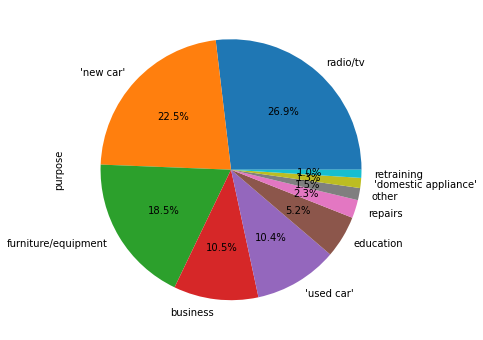

In [28]:
# purpose
print(credit_risk['purpose'].value_counts())
credit_risk['purpose'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

  * later we are pulling all the lowest sub-categories as 'others

'<100'                476
'no known savings'    145
'100<=X<500'           87
'500<=X<1000'          52
'>=1000'               40
Name: savings_status, dtype: int64


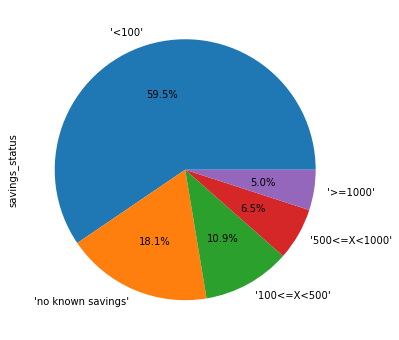

In [31]:
# saving_status
print(credit_risk['savings_status'].value_counts())
credit_risk['savings_status'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

'1<=X<4'      263
'>=7'         204
'4<=X<7'      142
'<1'          139
unemployed     52
Name: employment, dtype: int64


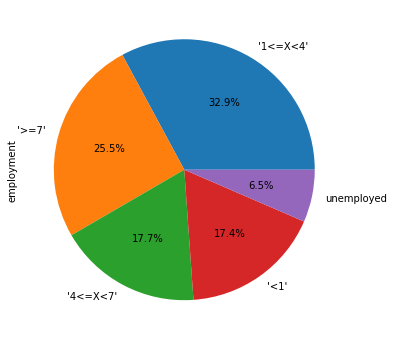

In [32]:
# employment
print(credit_risk['employment'].value_counts())
credit_risk['employment'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

'male single'           429
'female div/dep/mar'    252
'male mar/wid'           74
'male div/sep'           45
Name: personal_status, dtype: int64


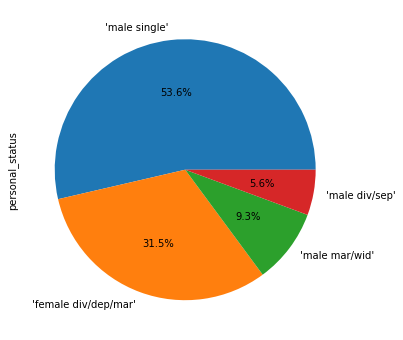

In [33]:
# personal_status
print(credit_risk['personal_status'].value_counts())
credit_risk['personal_status'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

none              726
guarantor          39
'co applicant'     35
Name: other_parties, dtype: int64


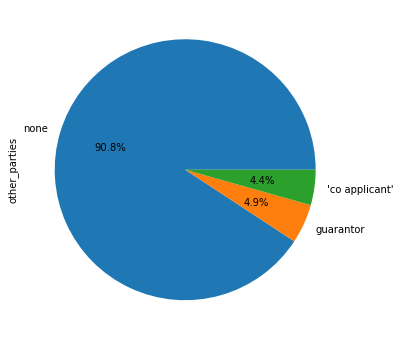

In [34]:
# other_parties
print(credit_risk['other_parties'].value_counts())
credit_risk['other_parties'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

  > their is huge bais in distribution.
  
  > this attribute does not give any clear idea like the credit is guranteed by other or not. So we can drop this attribute.


car                    261
'real estate'          226
'life insurance'       190
'no known property'    123
Name: property_magnitude, dtype: int64


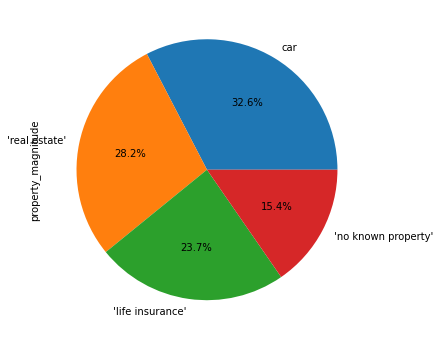

In [35]:
# property_magnitude
print(credit_risk['property_magnitude'].value_counts())
credit_risk['property_magnitude'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

- other_payment_plans attribute -
 
   > credit_risk['other_payment_plans'] is irrelevant attribute. If customer has other plans or not like in future or at present. It doen't matter for issuing credit to customer. So we simply going to drop this attribut.

own           565
rent          149
'for free'     86
Name: housing, dtype: int64


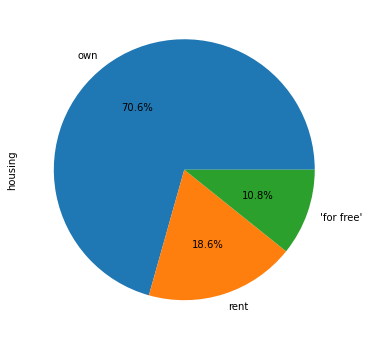

In [36]:
# housing
print(credit_risk['housing'].value_counts())
credit_risk['housing'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

skilled                        507
'unskilled resident'           154
'high qualif/self emp/mgmt'    120
'unemp/unskilled non res'       19
Name: job, dtype: int64


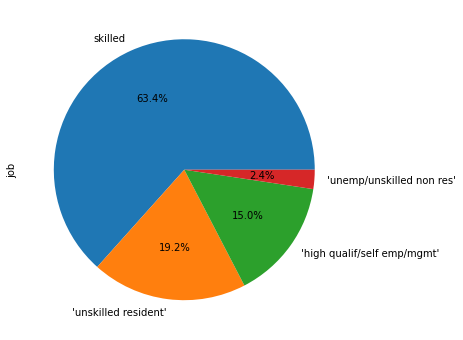

In [37]:
# job
print(credit_risk['job'].value_counts())
credit_risk['job'].value_counts(normalize = True).plot(kind = 'pie', autopct = '%1.1f%%', figsize = (8, 6))

In [41]:
print("own_telephone : ")
print("*"* 20)
print(credit_risk['own_telephone'].value_counts())
print("-"*35)
print("foreign_worker : ")
print("*"* 20)
print(credit_risk['foreign_worker'].value_counts())


own_telephone : 
********************
none    476
yes     324
Name: own_telephone, dtype: int64
-----------------------------------
foreign_worker : 
********************
yes    772
no      28
Name: foreign_worker, dtype: int64


  > Above both attributes are irrelevent for our model prediction.
  
  > But if we think by other perspective if their are almost 97% are foreing workers, their is chances of credit risk. Nut it's quite doubtful because their can't be around 97% loanee's are foreign worker.We will check that in feature selection.

#### Correlation

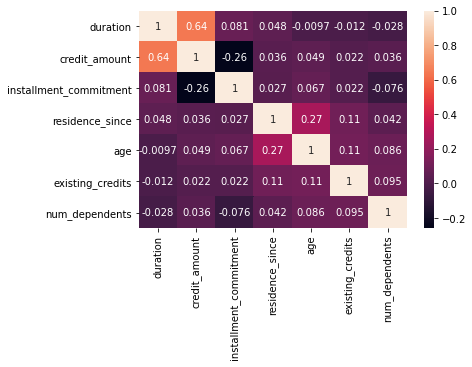

In [43]:
sns.heatmap(credit_risk.corr(), annot = True)

       1. duration & credit_amount has correlation of 0.64
       2. age & residence_since has 0.27 correlation.
       3. existing_credits are correlated with age & residence_since 0.11 respectively.

### Data Preprocessing